# <h1 style="font-family: Trebuchet MS; padding: 5px; font-size: 48px; color: #0066b2; text-align: center; line-height: 1;"><b>Fraud Detection<span style="color: #000000"> Data Exploration </span></b></h1>


<a id="0"></a>

----

  
## Table of Contents
1. [Context](#context)
2. [Import Necessary Libraries](#import-libraries)
3. [Import Data](#import-data)
4. [Data Exploration](#data-exploration)
     1. [Data Shape and Info](#data-info)
     2. [Correlation matrix](#correlation)
     3. [Transaction Categories](#category)
        1. [Q: How does the distribution of transaction categories differ for fraudulent and non-fraudulent transactions](#Q1)
        1. [Q: What categories of transactions are most often associated with fraud?](#Q2)
        1. [The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category](#Q3) 
     4. [Distribution of Genders](#gender)
     5. [Distribution of is_fraud](#is_fraud)
     5. [Distribution of year](#year)
     6. [Distribution of Transaction Amounts](#transaction)
        1. [Q: How does the transaction amount distribution vary for fraudulent and non-fraudulent transactions](#Q11)
     7. [Age Distribution of Customers](#age)
     8. [Transaction Date and Time (trans_date_trans_time)](#time)
        1. [Transaction count by hour and grouped by 'is_fraud'](#Q21)
        1. [Q: At what time of the day should we intensify fraud detection efforts to maximize the likelihood of detecting fraudulent transactions?](#Q22)
        1. [Transaction count by day of the week and grouped by 'is_fraud'](#Q23)
        1. [Transaction count by month and grouped by 'is_fraud'](#24)
        1. [Q: In which month did we observe the highest number of frauds? How many frauds were detected in that month?](#Q25)
     9. [Credit Card Number (cc_num) Analysis](#cc_num)
        1. [Analyze the relationship between credit card numbers and transaction amounts grouped by 'is_fraud'](#Q31)
     1. [Merchant Analysis](#merchant)
        1. [Q: How does the transaction amount vary for different merchants, grouped by fraudulence?](#Q41)
        1. [Q: Which Merchant had the highest number of reported frauds?](#Q42)
     1. [State Analysis](#state)
        1. [Transaction count by state and grouped by 'is_fraud'](#Q51)
        1. [Q: Which State had the highest number of reported frauds?](#Q52)
        
     1. [City Analysis](#city)
        1. [Transaction count by city and grouped by 'is_fraud'](#Q61)
        1. [Q: Which city had the highest number of reported frauds?](#Q62)
        
     1. [Job Analysis](#job)
        1. [Transaction count by job and grouped by 'is_fraud'](#Q71)
        1. [Q: Which job had the highest number of reported frauds?](#72)


---

<a id="context"></a>


# **Context**


Fraud detection analytics involves analyzing fraud data to generate insights and metrics used to set targets and forecast future fraud occurrences.

 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>
  
---
  
## **Content**
``Unnamed: 0`` - Index or identifier for the data entries.

``trans_date_trans_time`` - Date and time of the transaction.

``cc_num`` - Credit card number used for the transaction.

``merchant`` - Merchant or vendor involved in the transaction.

``category`` - Category or type of transaction.

``amt`` - Transaction amount.

``first`` - First name of the credit card holder.

``last`` - Last name of the credit card holder.

``gender`` - Gender of the credit card holder.

``street`` - Street address of the credit card holder.

``city`` - City of the credit card holder.

``state`` - State of the credit card holder.

``zip`` - ZIP code of the credit card holder.

``lat`` - Latitude coordinate associated with the transaction.

``long`` - Longitude coordinate associated with the transaction.

``city_pop`` - Population of the city where the transaction occurred.

``job`` - Occupation or job of the credit card holder.

``dob`` - Date of birth of the credit card holder.

``trans_num`` -  Transaction number or identifier.

``unix_time`` - Transaction time in UNIX timestamp format.

``merch_lat`` - Latitude coordinate of the merchant's location.

``merch_long`` - Longitude coordinate of the merchant's location.

``is_fraud`` - Indicator for whether the transaction is fraudulent (binary: 1 for fraud, 0 for non-fraud).

<a id="import-libraries"></a>

# **Import Necessary Libraries**

 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import seaborn as sns
from datetime import datetime

pd.set_option('display.max_columns', None)

<a id="import-data"></a>

# import data

 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>

In [89]:
data = pd.read_csv("../data/fraudTrain.csv")
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [90]:
data=data.drop(['Unnamed: 0'],axis=1)

In [91]:
# extract age
data['dob'] = pd.to_datetime(data['dob'])
current_date = datetime.now()
data['age'] = data['dob'].apply(lambda x: relativedelta(current_date, x).years)
data[['dob', 'age']]

,dob,age
0,1988-03-09,35
1,1978-06-21,45
2,1962-01-19,61
3,1967-01-12,56
4,1986-03-28,37
...,...,...
1296670,1961-11-24,61
1296671,1979-12-11,43
1296672,1967-08-30,56
1296673,1980-08-18,43


In [92]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
data['year'] = data['trans_date_trans_time'].dt.year
data['month'] = data['trans_date_trans_time'].dt.month
data['day'] = data['trans_date_trans_time'].dt.day
data['hour'] = data['trans_date_trans_time'].dt.hour
data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek
data['minute'] = data['trans_date_trans_time'].dt.minute
data['second'] = data['trans_date_trans_time'].dt.second

In [94]:
data=data.drop(['dob','trans_date_trans_time'],axis=1)
data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,year,month,day,hour,day_of_week,minute,second
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,35,2019,1,1,0,1,0,18
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,45,2019,1,1,0,1,0,44
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,61,2019,1,1,0,1,0,51
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,56,2019,1,1,0,1,1,16
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,37,2019,1,1,0,1,3,6


In [11]:
data.isnull().sum()

cc_num        0
merchant      0
category      0
amt           0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
trans_num     0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
age           0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

In [107]:
data.duplicated().sum()

0



---
<a id="data-exploration"></a><p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;">Data exploration
</p>

 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>
  
  


<a id="data-info"></a>

## Data Shape and Info

In [95]:
data.shape

(1296675, 28)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   cc_num       1296675 non-null  int64  
 1   merchant     1296675 non-null  object 
 2   category     1296675 non-null  object 
 3   amt          1296675 non-null  float64
 4   first        1296675 non-null  object 
 5   last         1296675 non-null  object 
 6   gender       1296675 non-null  object 
 7   street       1296675 non-null  object 
 8   city         1296675 non-null  object 
 9   state        1296675 non-null  object 
 10  zip          1296675 non-null  int64  
 11  lat          1296675 non-null  float64
 12  long         1296675 non-null  float64
 13  city_pop     1296675 non-null  int64  
 14  job          1296675 non-null  object 
 15  trans_num    1296675 non-null  object 
 16  unix_time    1296675 non-null  int64  
 17  merch_lat    1296675 non-null  float64
 18  me

In [98]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age,year,month,day,hour,day_of_week,minute,second
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.952450e+01,2.019287e+03,6.142150e+00,1.558798e+01,1.280486e+01,3.070604e+00,2.949529e+01,2.950215e+01
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,1.739390e+01,4.522452e-01,3.417703e+00,8.829121e+00,6.817824e+00,2.198153e+00,1.732018e+01,1.731539e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.800000e+01,2.019000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,3.600000e+01,2.019000e+03,3.000000e+00,8.000000e+00,7.000000e+00,1.000000e+00,1.400000e+01,1.500000e+01
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.700000e+01,2.019000e+03,6.000000e+00,1.500000e+01,1.400000e+01,3.000000e+00,3.000000e+01,3.000000e+01
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.100000e+01,2.020000e+03,9.000000e+00,2.300000e+01,1.900000e+01,5.000000e+00,4.400000e+01,4.400000e+01
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.800000e+01,2.020000e+03,1.200000e+01,3.100000e+01,2.300000e+01,6.000000e+00,5.900000e+01,5.900000e+01


In [103]:
data.groupby('is_fraud').describe()

cc_num                                                          \
              count          mean           std           min           25%   
is_fraud                                                                      
0         1289169.0  4.172901e+17  1.308990e+18  6.041621e+10  1.800429e+14   
1            7506.0  4.003577e+17  1.276871e+18  6.041621e+10  1.800429e+14   

                                                          amt              \
                   50%           75%           max      count        mean   
is_fraud                                                                    
0         3.521417e+15  4.642255e+15  4.992346e+18  1289169.0   67.667110   
1         3.528041e+15  4.651007e+15  4.992346e+18     7506.0  531.320092   

                                                                        zip  \
                 std   min       25%      50%      75%       max      count   
is_fraud                                                                      
0         154.007971  1.00    9.6100   47.280   82.540  28948.90  1289169.0   
1         390.560070  1.06  245.6625  396.505  900.875   1376.04     7506.0   

                                                                         \
                  mean           std     min      25%      50%      75%   
is_fraud                                                                  
0         48805.107481  26890.987012  1257.0  26237.0  48174.0  72042.0   
1         48038.714229  27265.558212  1330.0  24927.0  46290.0  71107.0   

                         lat                                                  \
              max      count       mean       std      min      25%      50%   
is_fraud                                                                       
0         99783.0  1289169.0  38.536888  5.075234  20.0271  34.6205  39.3543   
1         99783.0     7506.0  38.663609  5.172289  20.0271  35.0561  39.4336   

                                   long                                  \
                75%      max      count       mean        std       min   
is_fraud                                                                  
0         41.940400  65.6899  1289169.0 -90.228142  13.755982 -165.6723   
1         42.073175  66.6933     7506.0 -89.916041  14.278221 -165.6723   

                                              city_pop                \
             25%      50%      75%      max      count          mean   
is_fraud                                                               
0        -96.798 -87.4769 -80.1580 -67.9503  1289169.0  88775.228137   
1        -96.701 -86.6919 -79.9416 -68.5565     7506.0  97276.763256   

                                                                  unix_time  \
                    std   min    25%     50%      75%        max      count   
is_fraud                                                                      
0         301806.545204  23.0  743.0  2456.0  20328.0  2906700.0  1289169.0   
1         326581.466670  23.0  746.5  2623.0  21437.0  2906700.0     7506.0   

                                                                  \
                  mean           std           min           25%   
is_fraud                                                           
0         1.349249e+09  1.283514e+07  1.325376e+09  1.338759e+09   
1         1.348389e+09  1.383020e+07  1.325466e+09  1.335744e+09   

                                                    merch_lat             \
                   50%           75%           max      count       mean   
is_fraud                                                                   
0         1.349254e+09  1.359378e+09  1.371817e+09  1289169.0  38.536659   
1         1.348872e+09  1.360021e+09  1.371787e+09     7506.0  38.653901   

                                                                           \
               std        min        25%        50%        75%        max   
is_fraud                                         

In [104]:
numerical = data.select_dtypes(['int64', 'float64']).columns # getting the Uniqueness numerical variable
categorical = data.select_dtypes(['category', 'object']).columns # getting the Uniqueness catrgorical variable
for col in categorical:
    print('{} : {} unique value(s)'.format(col, data[col].nunique()))

merchant : 693 unique value(s)
category : 14 unique value(s)
first : 352 unique value(s)
last : 481 unique value(s)
gender : 2 unique value(s)
street : 983 unique value(s)
city : 894 unique value(s)
state : 51 unique value(s)
job : 494 unique value(s)
trans_num : 1296675 unique value(s)


---
<a id="correlation"></a><p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;">Correlation matrix
</p>

 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>
  
  


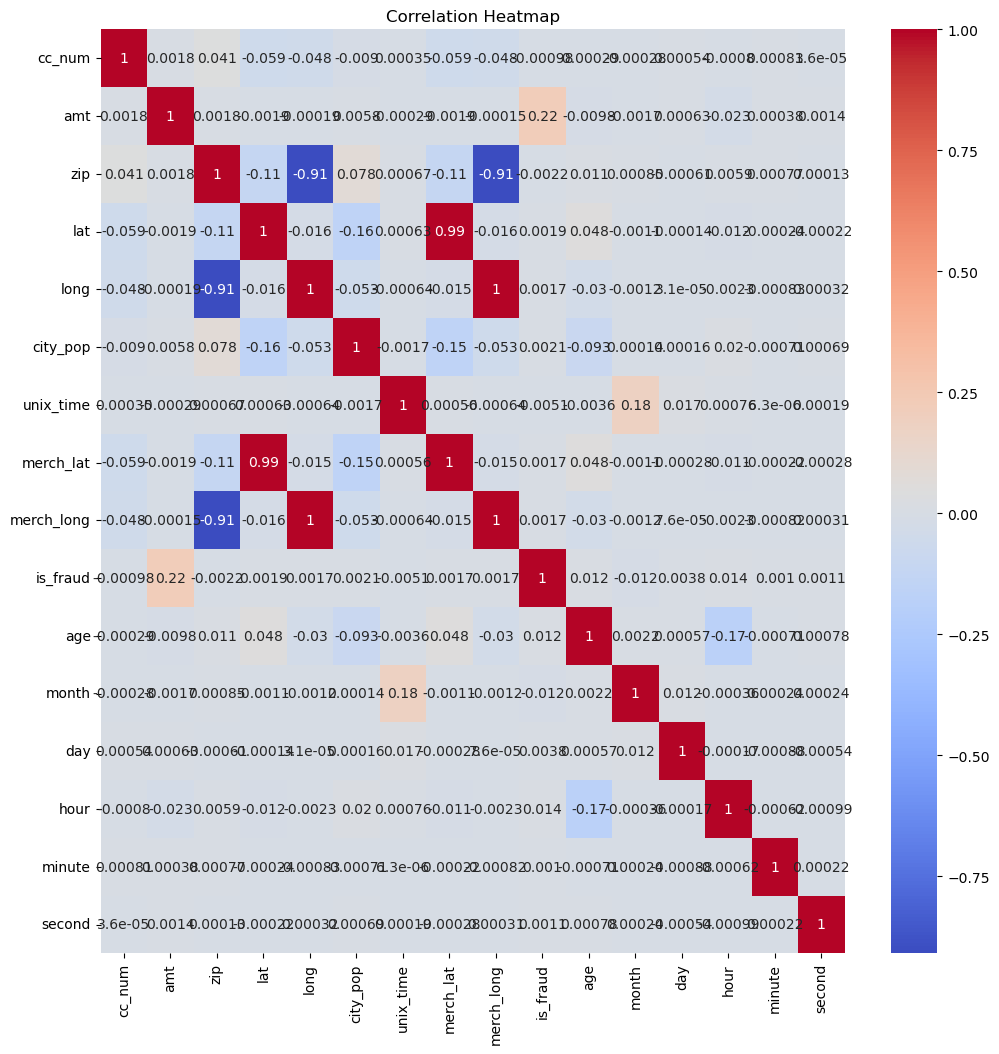

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 12))
correlation_matrix = data[numerical].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

---
<a id="category"></a><p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;">Transaction Category
</p>

 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>
  
  


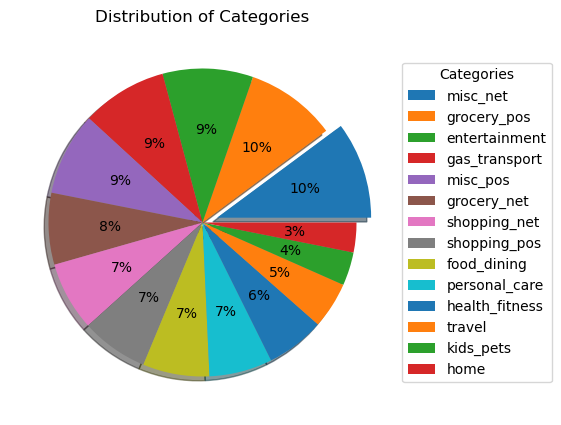

In [145]:
highlight = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(data['category'].value_counts(), autopct='%1.0f%%', shadow=True, explode=highlight)

plt.title('Distribution of Categories')
plt.legend(wedges, data['category'].unique(), title='Categories', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

<a id="Q1"></a>

### Q: How does the distribution of transaction categories differ for fraudulent and non-fraudulent transactions?

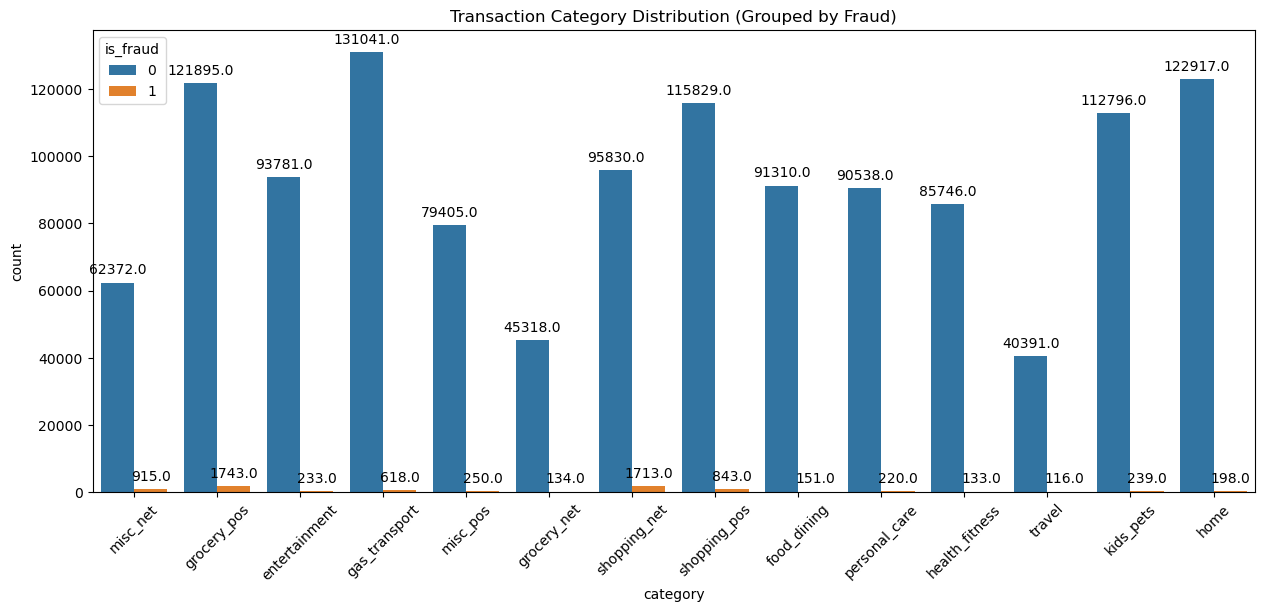

In [153]:
# Analyze the distribution of transaction categories for fraudulent and non-fraudulent transactions
fig, axs = plt.subplots(1, 1, figsize=(15, 6))
sns.countplot(x='category', data=data, hue="is_fraud", ax=axs)
axs.set_title('Transaction Category Distribution (Grouped by Fraud)')
axs.tick_params(axis='x', rotation=45)  
for p in axs.patches:
    axs.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.show()

<a id="Q2"></a>

### Q: What categories of transactions are most often associated with fraud?

In [156]:
fraudulent_categories = data[data['is_fraud'] == 1]['category'].value_counts()
print("Frequently associated categories with fraud:")
print(fraudulent_categories)

Frequently associated categories with fraud:
grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: category, dtype: int64


<a id="Q3"></a>

#### The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category

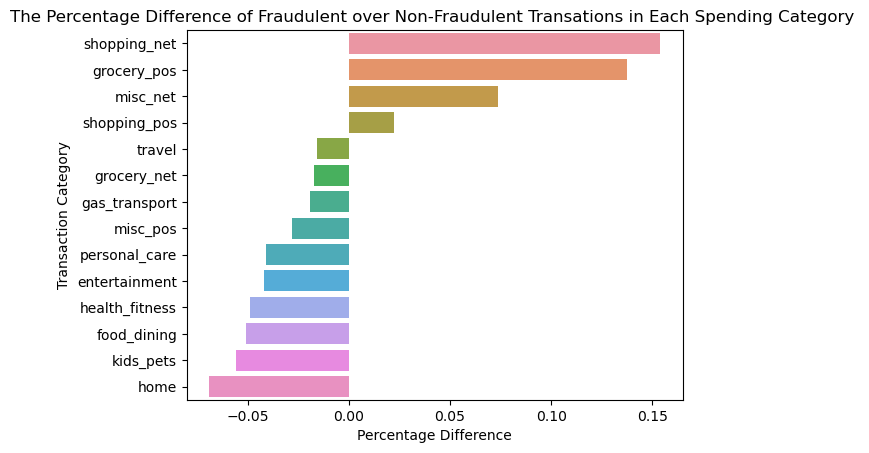

In [158]:
a=data[data['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=data[data['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')
plt.show()

----
<a id="gender"></a><p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;">Distribution of genders</p>




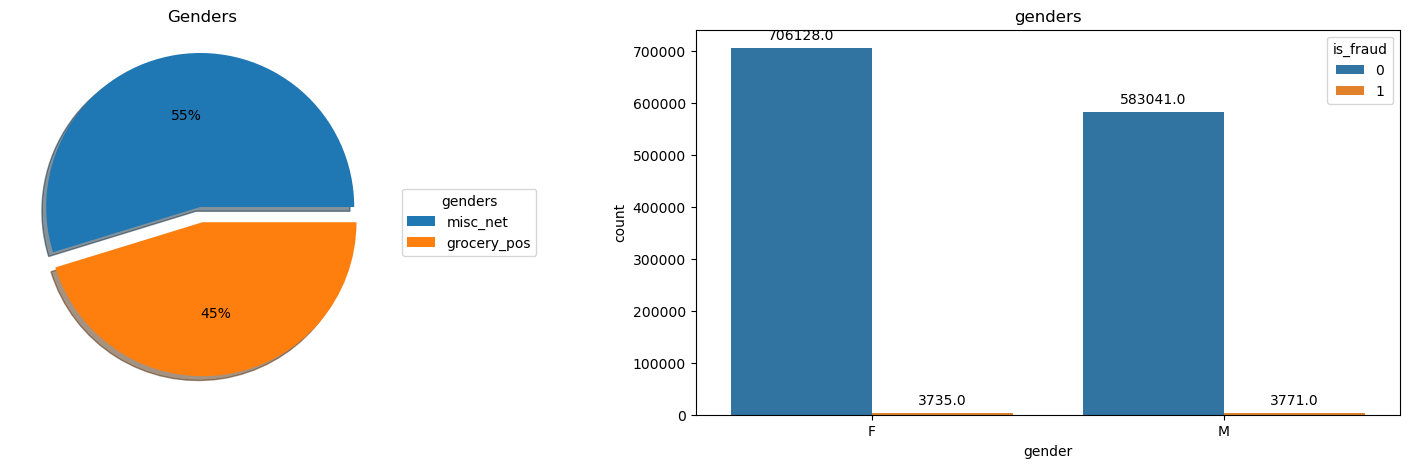

In [17]:
highlight = (0.1, 0)  

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
wedges, texts, autotexts = axs[0].pie(data['gender'].value_counts(), autopct='%1.0f%%', shadow=True, explode=highlight)

axs[0].set_title('Genders')
axs[0].legend(wedges, data['gender'].unique(), title='genders', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

sns.countplot(x='gender', data=data, hue="is_fraud", ax=axs[1])
axs[1].set_title('genders')

for p in axs[1].patches:
    axs[1].annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()


---
<a id="is_fraud"></a><p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;">Distribution of is_fraud
</p>



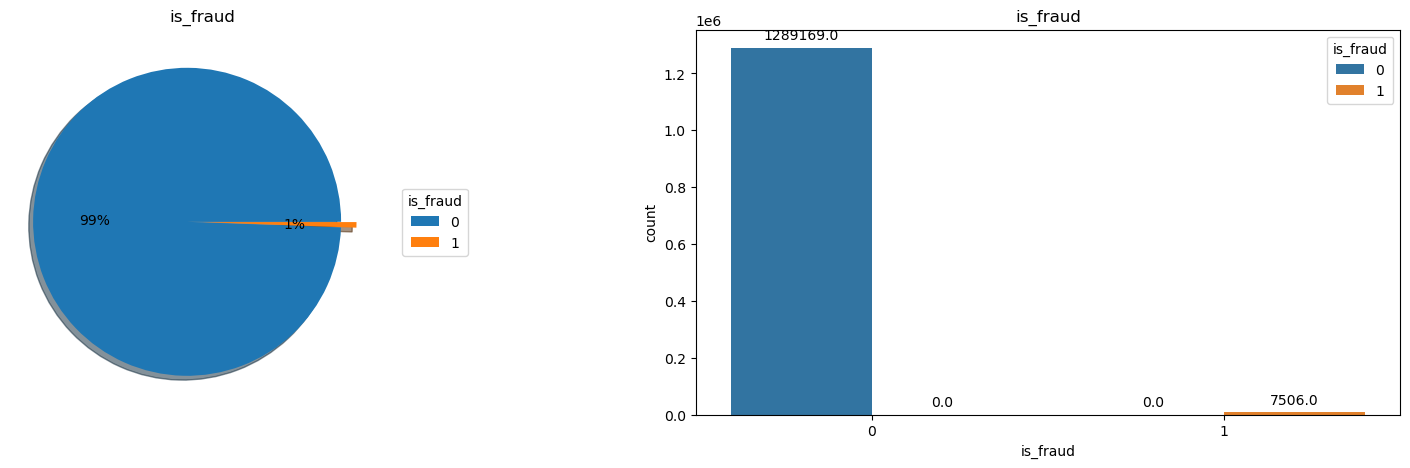

In [106]:
highlight = (0.1, 0)  

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
wedges, texts, autotexts = axs[0].pie(data['is_fraud'].value_counts(), autopct='%1.0f%%', shadow=True, explode=highlight)

axs[0].set_title('is_fraud')
axs[0].legend(wedges, data['is_fraud'].unique(), title='is_fraud', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

sns.countplot(x='is_fraud', data=data, hue="is_fraud", ax=axs[1])
axs[1].set_title('is_fraud')

for p in axs[1].patches:
    axs[1].annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()


---
<a id="year"></a><p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;">Distribution of year
</p>


 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>




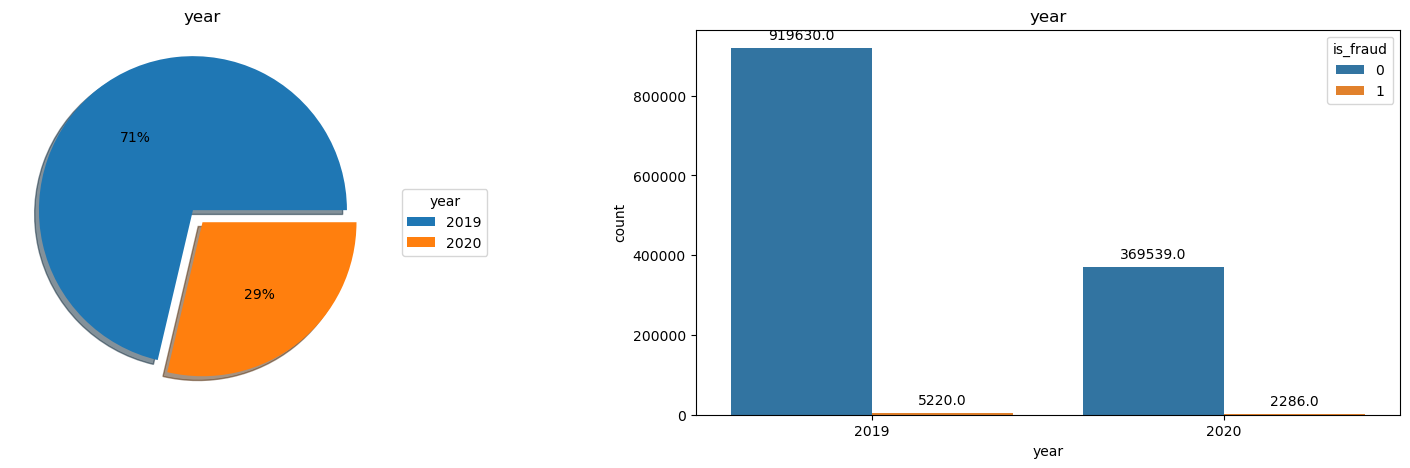

In [175]:
highlight = (0.1, 0)  

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
wedges, texts, autotexts = axs[0].pie(data['year'].value_counts(), autopct='%1.0f%%', shadow=True, explode=highlight)

axs[0].set_title('year')
axs[0].legend(wedges, data['year'].unique(), title='year', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

sns.countplot(x='year', data=data, hue="is_fraud", ax=axs[1])
axs[1].set_title('year')

for p in axs[1].patches:
    axs[1].annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()


---
<a id="transaction"></a><p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;">Distribution of Transaction Amounts
</p>


 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>
  
  
  


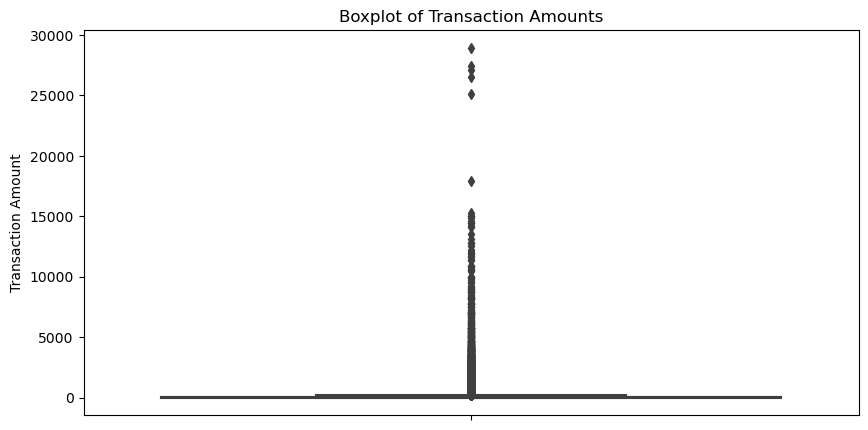

In [359]:
plt.figure(figsize=(10, 5))
sns.boxplot(y='amt',hue="is_fraud", data=data)
plt.ylabel('Transaction Amount')
plt.title('Boxplot of Transaction Amounts')
plt.show()

<a id="Q11"></a>

### Q: How does the transaction amount distribution vary for fraudulent and non-fraudulent transactions



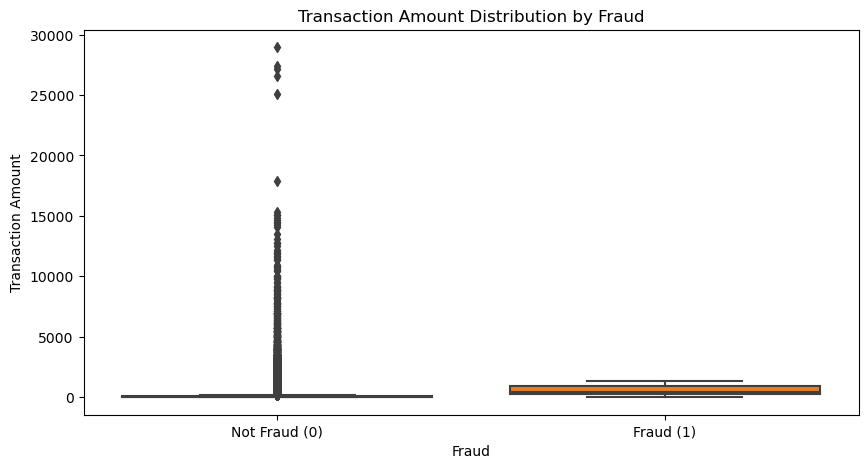

In [357]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='is_fraud', y='amt')
plt.xlabel('Fraud')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Distribution by Fraud')
plt.xticks(ticks=[0, 1], labels=['Not Fraud (0)', 'Fraud (1)'])
plt.show()


In [360]:
Q1 = data['amt'].quantile(0.25)
Q3 = data['amt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['amt'] < lower_bound) | (data['amt'] > upper_bound)]
print('Number of outliers:', len(outliers))
print('Outliers:')

Number of outliers: 67290
Outliers:


---
<a id="age"></a><p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;">Age Distribution of Customers 
</p>


 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>
  
  
  
  

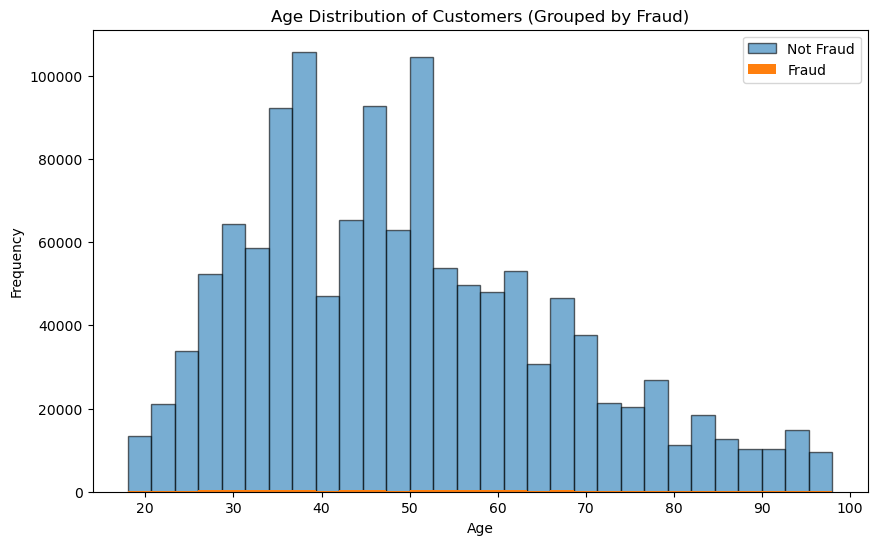

In [124]:
plt.figure(figsize=(10, 6))

non_fraud_age = data[data['is_fraud'] == 0]['age']
plt.hist(non_fraud_age, bins=30, edgecolor='black', alpha=0.6, label='Not Fraud')

fraud_age = data[data['is_fraud'] == 1]['age']
plt.hist(fraud_age, bins=30, label='Fraud')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Customers (Grouped by Fraud)')
plt.legend()
plt.show()

---
<a id="time"></a><p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;"> Transaction Date and Time (trans_date_trans_time)
</p>


 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>





<a id="Q21"></a>

## Transaction count by hour and grouped by 'is_fraud'


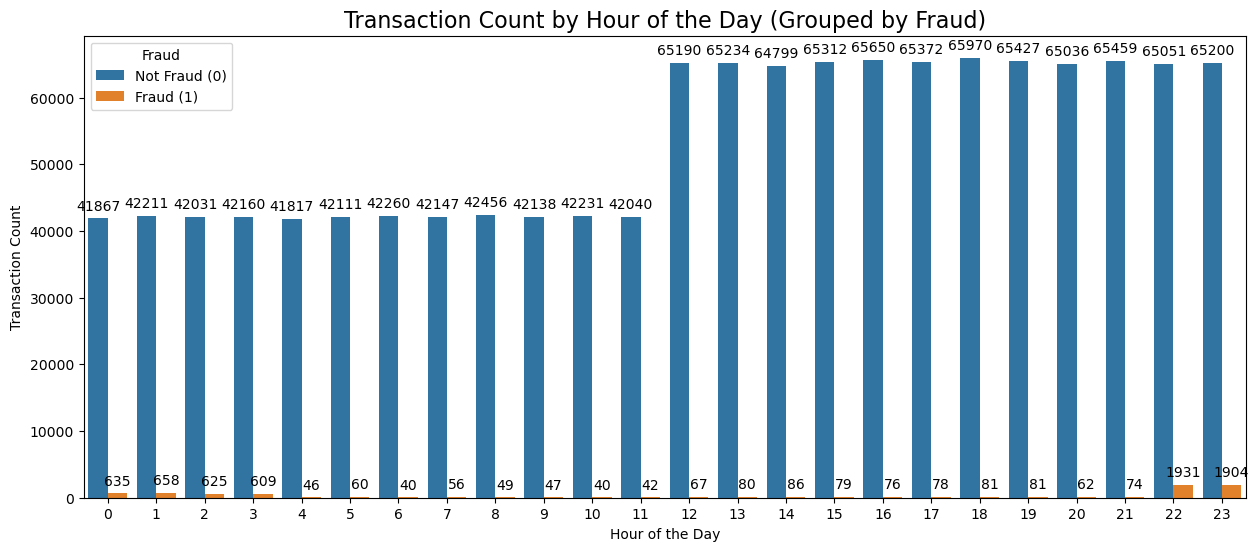

In [168]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df, x='hour', hue='is_fraud')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Hour of the Day (Grouped by Fraud)', fontsize=16)
plt.legend(title='Fraud', labels=['Not Fraud (0)', 'Fraud (1)'])
plt.show()

<a id="Q22"></a>

## Q: At what time of the day should we intensify fraud detection efforts to maximize the likelihood of detecting fraudulent transactions?


In [129]:
frauds_per_hour = data.groupby('hour')['is_fraud'].mean()
optimal_detection_time = frauds_per_hour.idxmax()
print("Optimal time for fraud detection:", optimal_detection_time, "hour.")

Optimal time for fraud detection: 22 hour.


In [354]:
sorted_frauds_per_hour = frauds_per_hour.sort_values(ascending=False)
cm_navy = sns.light_palette("navy", as_cmap=True)
print("Top 10 hours for potential fraud detection")
sorted_frauds_per_hour.to_frame().head(10).style.background_gradient(cmap=cm_navy)

Top 10 hours for potential fraud detection


,is_fraud
hour,
22,0.028829
23,0.028374
1,0.015349
0,0.014940
2,0.014652
3,0.014239
5,0.001423
7,0.001327
14,0.001325


<a id="Q23"></a>

## Transaction count by day of the week and grouped by 'is_fraud'

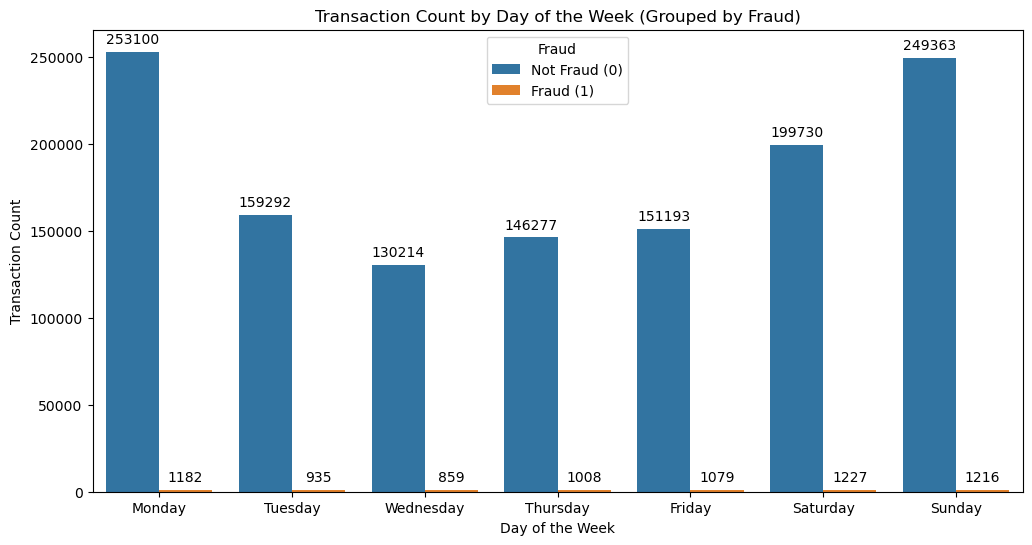

In [131]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='day_of_week', hue='is_fraud')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Day of the Week (Grouped by Fraud)')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Fraud', labels=['Not Fraud (0)', 'Fraud (1)'])
plt.show()

<a id="Q24"></a>

## Transaction count by month and grouped by 'is_fraud'

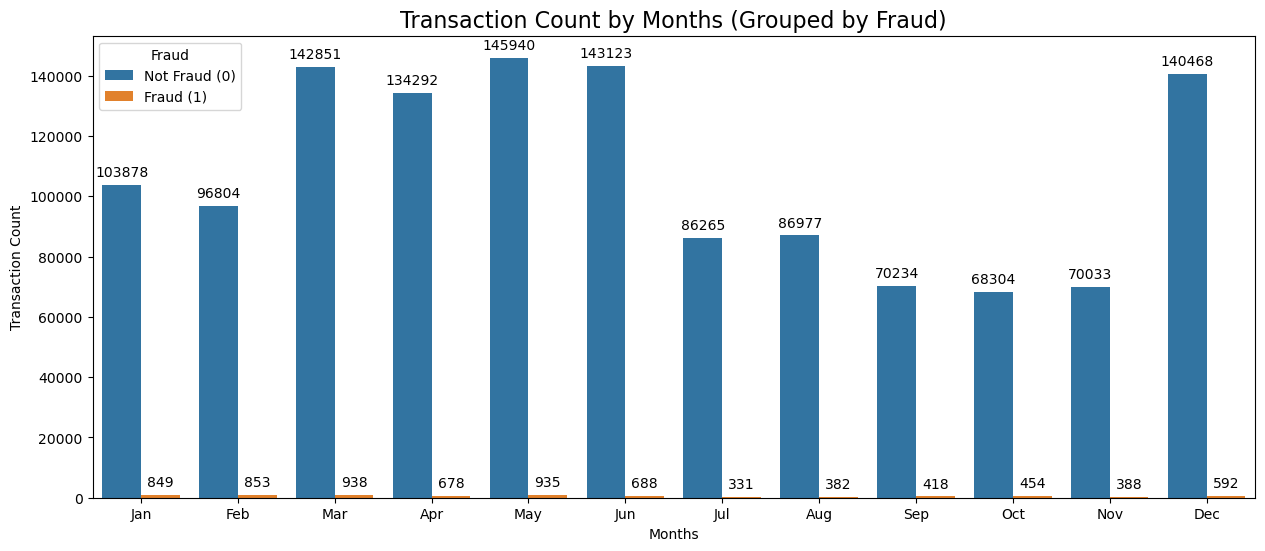

In [180]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df, x='month', hue='is_fraud')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')
plt.xlabel('Months')
plt.xticks(np.arange(0,12,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Months (Grouped by Fraud)', fontsize=16)
plt.legend(title='Fraud', labels=['Not Fraud (0)', 'Fraud (1)'])
plt.show()

<a id="Q25"></a>

## Q: In which month did we observe the highest number of frauds? How many frauds were detected in that month?


In [181]:
frauds_per_month = data.groupby('month')['is_fraud'].sum()
best_fraud_month = frauds_per_month.idxmax()
num_frauds_best_month = frauds_per_month.max()
print("Best month for fraud:", best_fraud_month, "with", num_frauds_best_month, "frauds.")

Best month for fraud: 3 with 938 frauds.


---
<a id="cc_num"></a><p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;"> Credit Card Number (cc_num) Analysis
</p>

 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>
  
  
  


<a id="Q31"></a>

## Analyze the relationship between credit card numbers and transaction amounts grouped by 'is_fraud'

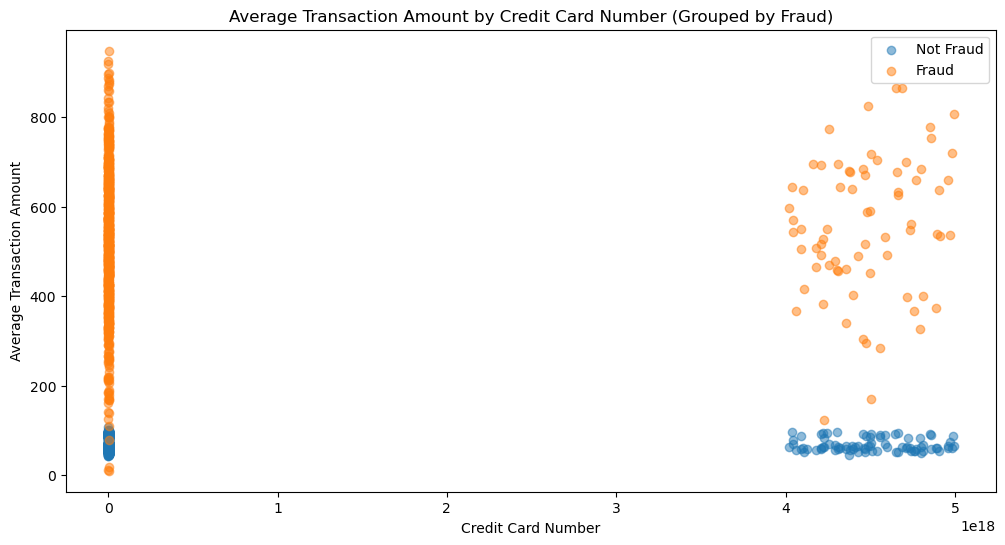

In [64]:
plt.figure(figsize=(12, 6))
non_fraud_cc_num_avg_amount = df[df['is_fraud'] == 0].groupby('cc_num')['amt'].mean()
plt.scatter(non_fraud_cc_num_avg_amount.index, non_fraud_cc_num_avg_amount.values, alpha=0.5, label='Not Fraud')
fraud_cc_num_avg_amount = df[df['is_fraud'] == 1].groupby('cc_num')['amt'].mean()
plt.scatter(fraud_cc_num_avg_amount.index, fraud_cc_num_avg_amount.values, alpha=0.5, label='Fraud')
plt.xlabel('Credit Card Number')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Credit Card Number (Grouped by Fraud)')
plt.legend()
plt.show()

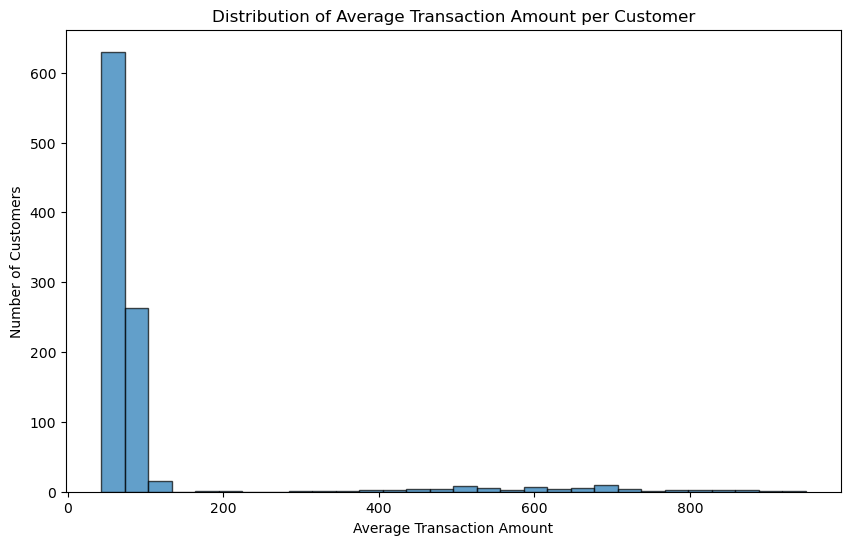

In [319]:
avg_transaction_amount_per_customer = data.groupby('cc_num')['amt'].mean()
plt.figure(figsize=(10, 6))
plt.hist(avg_transaction_amount_per_customer, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Average Transaction Amount')
plt.ylabel('Number of Customers')
plt.title('Distribution of Average Transaction Amount per Customer')
plt.show()

---
<a id="merchant"></a><p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;"> Merchant Analysis
</p>


 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>
  
  


<a id="Q41"></a>

## Q: How does the transaction amount vary for different merchants, grouped by fraudulence?

In [298]:
merchant_counts = data.groupby(['merchant', 'is_fraud']).size().unstack().fillna(0)
merchant_counts['total_fraud'] = merchant_counts[1]+merchant_counts[0]
merchant_counts=merchant_counts.sort_values(by='total_fraud', ascending=False)
merchant_counts.head(10)

is_fraud,0,1,total_fraud
merchant,,,
fraud_Kilback LLC,4356.0,47.0,4403.0
fraud_Cormier LLC,3601.0,48.0,3649.0
fraud_Schumm PLC,3603.0,31.0,3634.0
fraud_Kuhn LLC,3466.0,44.0,3510.0
fraud_Boyer PLC,3453.0,40.0,3493.0
fraud_Dickinson Ltd,3426.0,8.0,3434.0
fraud_Cummerata-Jones,2724.0,12.0,2736.0
fraud_Kutch LLC,2719.0,15.0,2734.0
"fraud_Olson, Becker and Koch",2712.0,11.0,2723.0


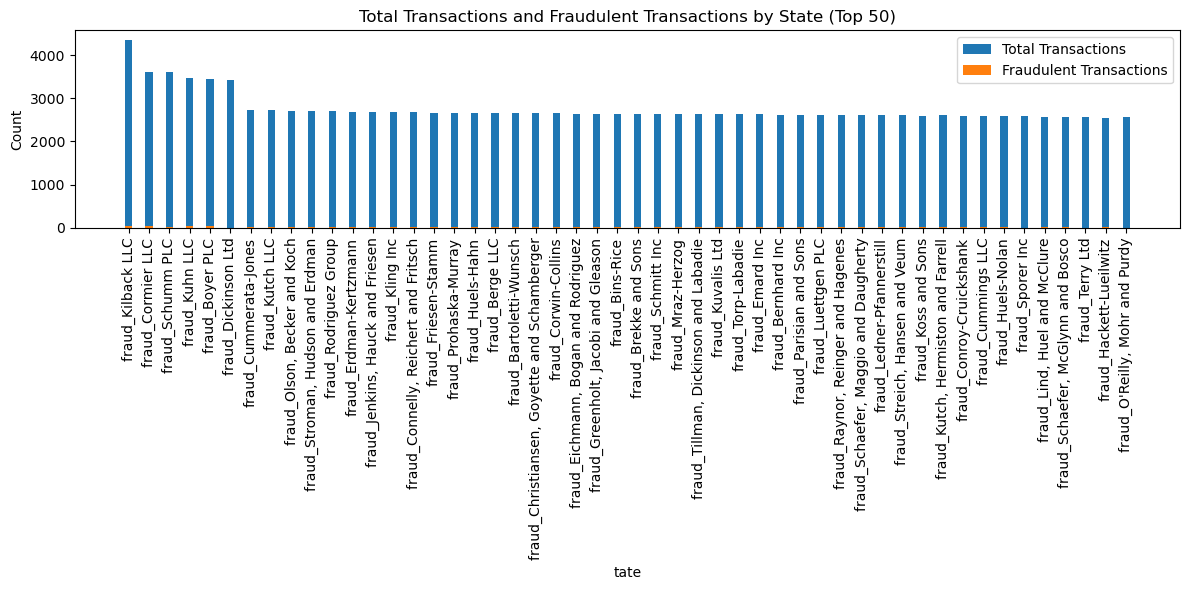

In [302]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(merchant_counts[:50]))
plt.bar(index, merchant_counts[:50][0], width=bar_width, label='Total Transactions')
plt.bar(index, merchant_counts[:50][1], width=bar_width, label='Fraudulent Transactions')

plt.xlabel('tate')
plt.ylabel('Count')
plt.title('Total Transactions and Fraudulent Transactions by State (Top 50)')
plt.xticks(index, merchant_counts[:50].index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


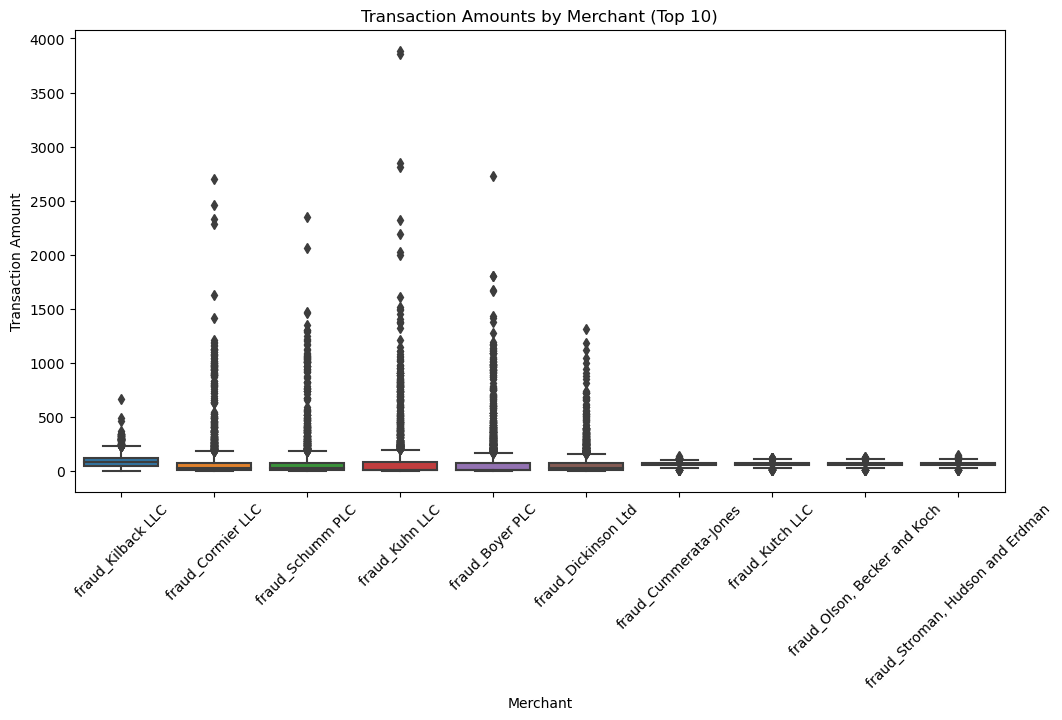

In [318]:
# Boxplot for transaction amounts by merchant
plt.figure(figsize=(12, 6))
sns.boxplot(x='merchant', y='amt', data=data, order=data['merchant'].value_counts().nlargest(10).index)
plt.xlabel('Merchant')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amounts by Merchant (Top 10)')
plt.xticks(rotation=45)
plt.show()

---
<a id="state"></a><p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;"> State Analysis
</p>


 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>
  
  


<a id="Q51"></a>

## Transaction count by state and grouped by 'is_fraud'

In [305]:
state_counts = data.groupby(['state', 'is_fraud']).size().unstack().fillna(0)
state_counts['total_fraud'] = state_counts[1]+state_counts[0]
state_counts=state_counts.sort_values(by='total_fraud', ascending=False)
state_counts.head(10)

is_fraud,0,1,total_fraud
state,,,
TX,94397.0,479.0,94876.0
NY,82946.0,555.0,83501.0
PA,79389.0,458.0,79847.0
CA,56034.0,326.0,56360.0
OH,46159.0,321.0,46480.0
MI,45916.0,238.0,46154.0
IL,43004.0,248.0,43252.0
FL,42390.0,281.0,42671.0
AL,40774.0,215.0,40989.0


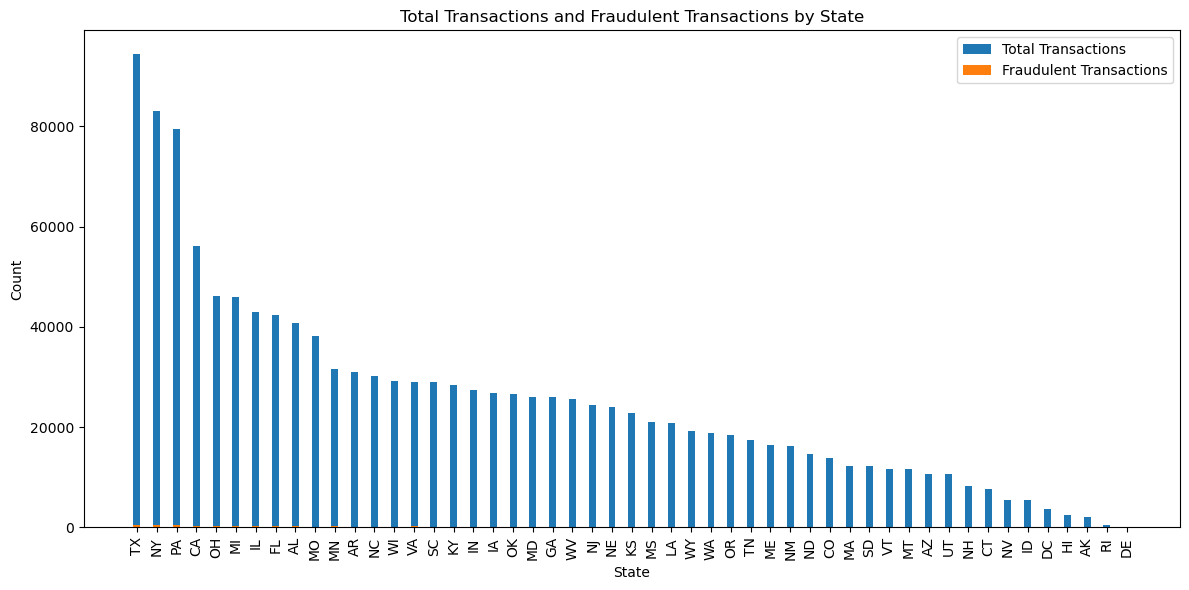

In [307]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(state_counts))
plt.bar(index, state_counts[0], width=bar_width, label='Total Transactions')
plt.bar(index, state_counts[1], width=bar_width, label='Fraudulent Transactions')

plt.xlabel('State')
plt.ylabel('Count')
plt.title('Total Transactions and Fraudulent Transactions by State')
plt.xticks(index, state_counts.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

<a id="Q52"></a>

## Q: Which State had the highest number of reported frauds?

In [365]:
state_frauds = data.groupby('state')['is_fraud'].sum()
state_with_highest_fraud = state_frauds.idxmax()
num_frauds_highest_state = state_frauds.max()
print("State with highest fraud occurrence:", state_with_highest_fraud, "with", num_frauds_highest_state, "frauds.")

State with highest fraud occurrence: NY with 555 frauds.


In [366]:
sorted_state_counts = state_counts.sort_values(by=1, ascending=False)
cm = sns.light_palette("navy", as_cmap=True)
sorted_state_counts.head(10).style.background_gradient(cmap=cm, subset=[1])

is_fraud,0,1,total_fraud
state,,,
NY,82946.000000,555.000000,83501.000000
TX,94397.000000,479.000000,94876.000000
PA,79389.000000,458.000000,79847.000000
CA,56034.000000,326.000000,56360.000000
OH,46159.000000,321.000000,46480.000000
FL,42390.000000,281.000000,42671.000000
IL,43004.000000,248.000000,43252.000000
MI,45916.000000,238.000000,46154.000000
AL,40774.000000,215.000000,40989.000000


---
<a id="city"></a><p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;"> City Analysis
</p>


 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>
  


<a id="Q61"></a>

## Transaction count by city and grouped by 'is_fraud'

In [323]:
city_counts = data.groupby(['city', 'is_fraud']).size().unstack().fillna(0)
city_counts['total_fraud'] = city_counts[1]+city_counts[0]
city_counts=city_counts.sort_values(by='total_fraud', ascending=False)
city_counts.head(10)

is_fraud,0,1,total_fraud
city,,,
Birmingham,5606.0,11.0,5617.0
San Antonio,5105.0,25.0,5130.0
Utica,5080.0,25.0,5105.0
Phoenix,5073.0,2.0,5075.0
Meridian,5047.0,13.0,5060.0
Thomas,4620.0,14.0,4634.0
Conway,4596.0,17.0,4613.0
Cleveland,4586.0,18.0,4604.0
Warren,4566.0,33.0,4599.0


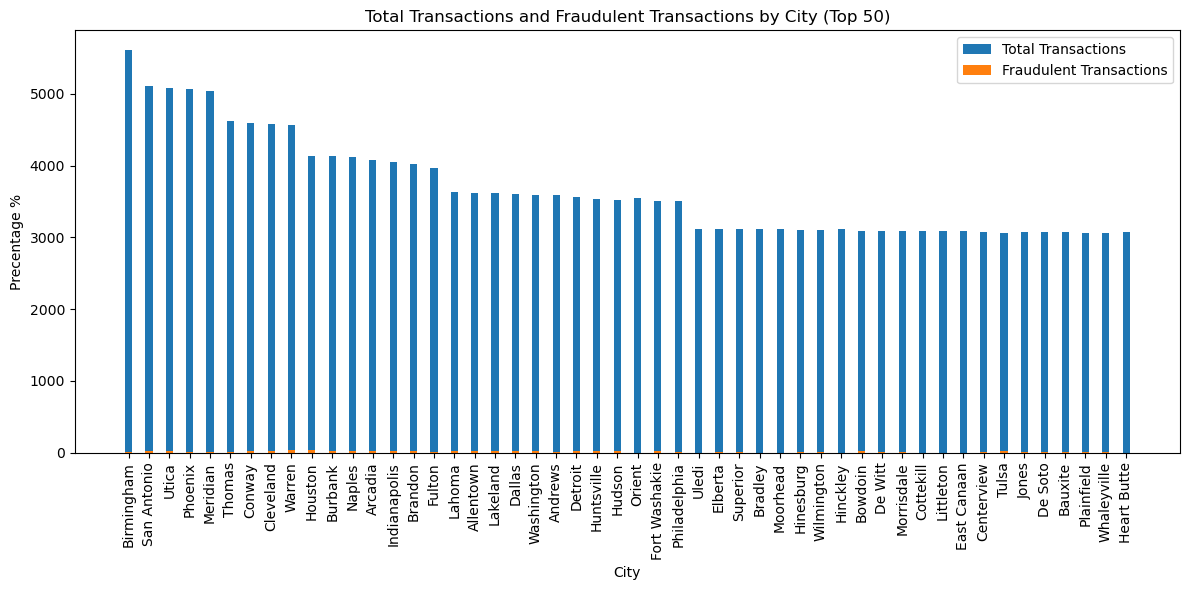

In [324]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(city_counts[:50]))
plt.bar(index, city_counts[:50][0], width=bar_width, label='Total Transactions')
plt.bar(index, city_counts[:50][1], width=bar_width, label='Fraudulent Transactions')

plt.xlabel('City')
plt.ylabel('Precentage %')
plt.title('Total Transactions and Fraudulent Transactions by City (Top 50)')
plt.xticks(index, city_counts[:50].index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


<a id="Q62"></a>

## Q: Which city had the highest number of reported frauds?

In [321]:
city_frauds = data.groupby('city')['is_fraud'].sum()
city_with_highest_fraud = city_frauds.idxmax()
num_frauds_highest_city = city_frauds.max()
print("City with highest fraud occurrence:", city_with_highest_fraud, "with", num_frauds_highest_city, "frauds.")

City with highest fraud occurrence: Houston with 39 frauds.


In [339]:
sorted_city_counts = city_counts.sort_values(by=1, ascending=False)
cm = sns.light_palette("navy", as_cmap=True)
sorted_city_counts.head(10).style.background_gradient(cmap=cm, subset=[1])

is_fraud,0,1,total_fraud
city,,,
Houston,4129.000000,39.000000,4168.000000
Warren,4566.000000,33.000000,4599.000000
Naples,4126.000000,29.000000,4155.000000
Huntsville,3531.000000,29.000000,3560.000000
Dallas,3602.000000,27.000000,3629.000000
Tulsa,3059.000000,27.000000,3086.000000
Topeka,3001.000000,27.000000,3028.000000
Detroit,3558.000000,26.000000,3584.000000
Randolph,1517.000000,25.000000,1542.000000


---
<a id="job"></a><p style="line-height: 2; font-size: 25px; font-weight: bold; letter-spacing: 2px; text-align: center;"> Job Analysis
</p>


 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>
  

<a id="Q71"></a>

## Transaction count by job and grouped by 'is_fraud'

In [285]:
job_counts = data.groupby(['job', 'is_fraud']).size().unstack().fillna(0)
job_counts['total_fraud'] = job_counts[1]+job_counts[0]
job_counts=job_counts.sort_values(by='total_fraud', ascending=False)
job_counts.head(10)

is_fraud,0,1,total_fraud
job,,,
Film/video editor,9735.0,44.0,9779.0
Exhibition designer,9148.0,51.0,9199.0
Naval architect,8631.0,53.0,8684.0
"Surveyor, land/geomatics",8630.0,50.0,8680.0
Materials engineer,8208.0,62.0,8270.0
"Designer, ceramics/pottery",8213.0,12.0,8225.0
Systems developer,7687.0,13.0,7700.0
IT trainer,7650.0,29.0,7679.0
Financial adviser,7636.0,23.0,7659.0


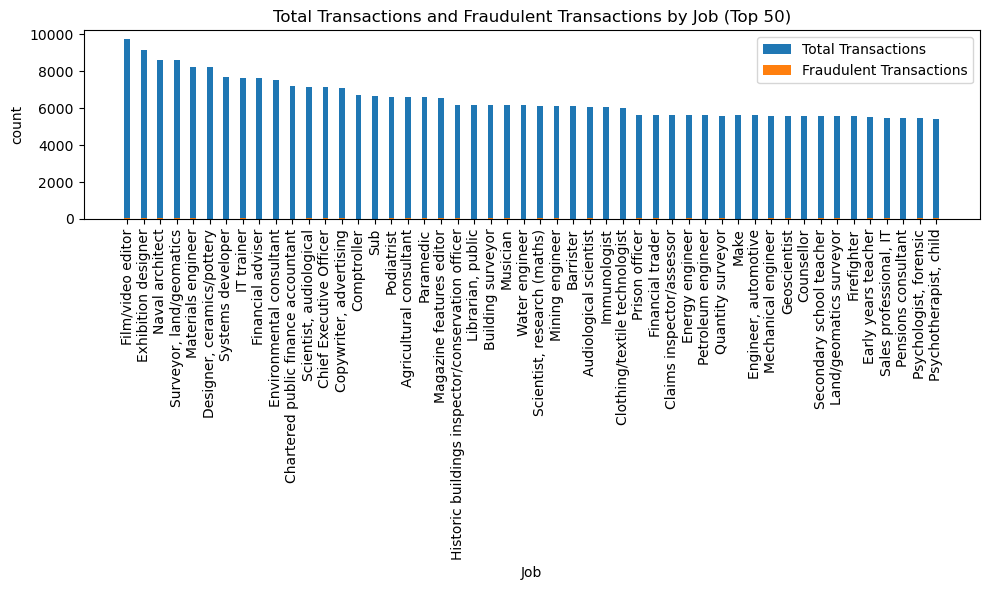

In [289]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(job_counts[:50]))
plt.bar(index, job_counts[:50][0], width=bar_width, label='Total Transactions')
plt.bar(index, job_counts[:50][1], width=bar_width, label='Fraudulent Transactions')

plt.xlabel('Job')
plt.ylabel('count')
plt.title("Total Transactions and Fraudulent Transactions by Job (Top 50)")
plt.xticks(index, job_counts[:50].index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


<a id="Q72"></a>

## Q: Which job had the highest number of reported frauds?

In [363]:
job_frauds = data.groupby('job')['is_fraud'].sum()
job_with_highest_fraud = job_frauds.idxmax()
num_frauds_highest_job = job_frauds.max()
print("Job with highest fraud occurrence:", job_with_highest_fraud, "with", num_frauds_highest_job, "frauds.")

Job with highest fraud occurrence: Materials engineer with 62 frauds.


In [364]:
sorted_job_counts = job_counts.sort_values(by=1, ascending=False)
cm = sns.light_palette("navy", as_cmap=True)
sorted_job_counts.head(10).style.background_gradient(cmap=cm, subset=[1])

is_fraud,0,1,total_fraud
job,,,
Materials engineer,8208.000000,62.000000,8270.000000
Trading standards officer,4585.000000,56.000000,4641.000000
Naval architect,8631.000000,53.000000,8684.000000
Exhibition designer,9148.000000,51.000000,9199.000000
"Surveyor, land/geomatics",8630.000000,50.000000,8680.000000
Mechanical engineer,5583.000000,49.000000,5632.000000
Quantity surveyor,5598.000000,48.000000,5646.000000
Prison officer,5653.000000,48.000000,5701.000000
Audiological scientist,6072.000000,46.000000,6118.000000


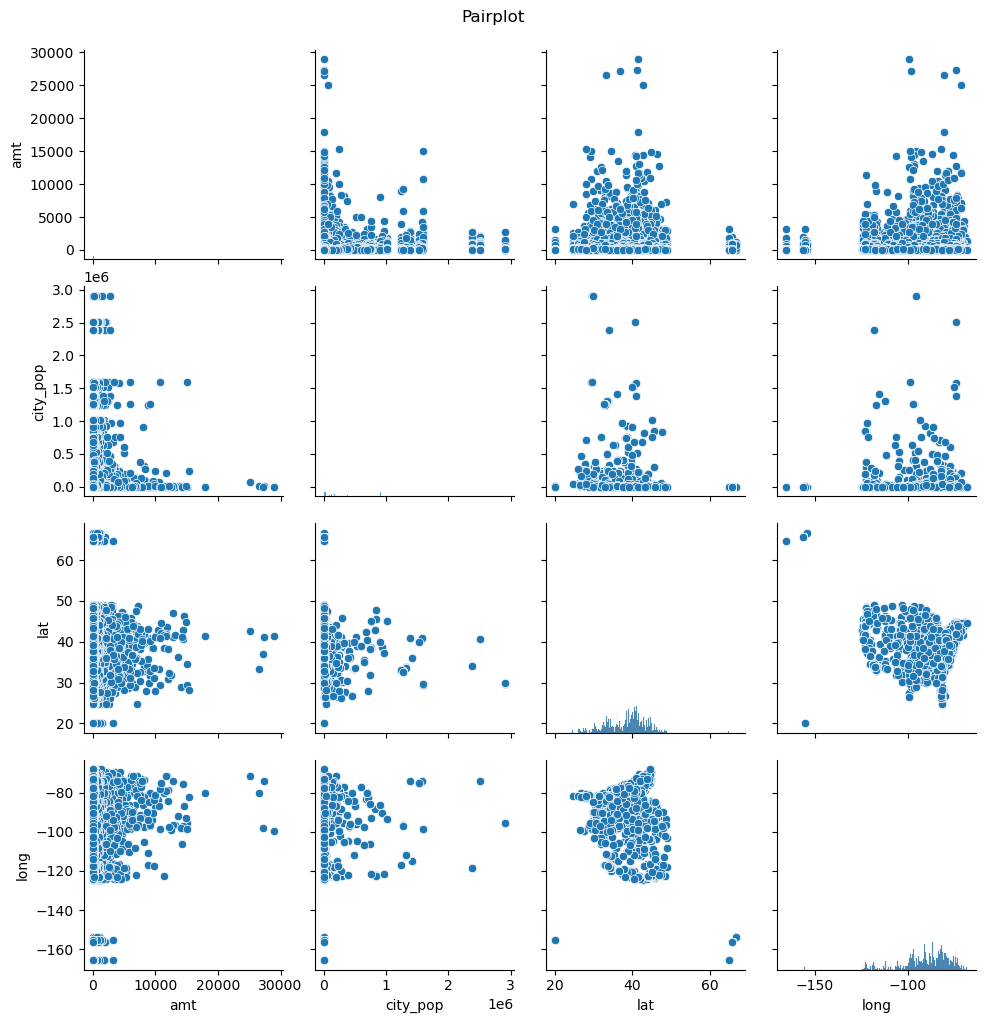

In [362]:
selected_features = ['amt', 'city_pop', 'lat', 'long']
sns.pairplot(data[selected_features])
plt.suptitle('Pairplot', y=1.02)
plt.show()